### SQL Refresher with SQLite and Python
This notebook provides a hands-on walkthrough of SQL concepts using an in-memory SQLite database. You'll see examples, explanations, and get a chance to practice.

#### Setup: Creating the In-Memory SQLite Database

In [33]:
import sqlite3
import pandas as pd

def run_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(rows, columns=columns)

# Create in-memory SQLite DB and cursor
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create tables
query = """
CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);

CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date TEXT,
    total_amount REAL,
    FOREIGN KEY(customer_id) REFERENCES customers(customer_id)
);

CREATE TABLE books (
    book_id INTEGER PRIMARY KEY,
    title TEXT,
    genre TEXT,
    qty INTEGER
);

CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    username TEXT
);

CREATE TABLE likes (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    post_id INTEGER
);
"""
cursor.executescript(query)

# Insert sample data (expanded for richer results)
cursor.executemany("INSERT INTO customers (first_name, last_name) VALUES (?, ?)", [
    ("Alice", "Smith"),
    ("Bob", "Johnson"),
    ("Charlie", "Lee"),
    ("Diana", "Wang"),
    ("Ethan", "Brown"),
    ("Fiona", "Garcia"),
    ("George", "Martinez"),
    ("Hannah", "Kim"),
    ("Ivan", "Patel"),
    ("Julia", "Nguyen")
])

cursor.executemany("INSERT INTO orders (customer_id, order_date, total_amount) VALUES (?, ?, ?)", [
    (1, "2023-01-15", 150.00),
    (2, "2023-01-17", 200.00),
    (1, "2023-01-20", 50.00),
    (3, "2023-01-22", 300.00),
    (4, "2023-01-25", 120.00),
    (5, "2023-01-27", 80.00),
    (6, "2023-01-29", 220.00),
    (7, "2023-02-01", 175.00),
    (8, "2023-02-03", 90.00),
    (9, "2023-02-05", 60.00),
    (10, "2023-02-07", 400.00),
    (2, "2023-02-10", 130.00),
    (3, "2023-02-12", 210.00),
    (4, "2023-02-14", 95.00),
    (5, "2023-02-16", 180.00)
])

cursor.executemany("INSERT INTO books (title, genre, qty) VALUES (?, ?, ?)", [
    ("Book A", "Fiction", 5),
    ("Book B", "Fiction", 10),
    ("Book C", "Non-Fiction", 8),
    ("Book D", "Sci-Fi", 12),
    ("Book E", "Sci-Fi", 7),
    ("Book F", "Fantasy", 15),
    ("Book G", "Fantasy", 3),
    ("Book H", "Mystery", 9),
    ("Book I", "Mystery", 11),
    ("Book J", "Non-Fiction", 14),
    ("Book K", "Fiction", 6),
    ("Book L", "Fantasy", 8),
    ("Book M", "Sci-Fi", 10),
    ("Book N", "Mystery", 5),
    ("Book O", "Non-Fiction", 13)
])

cursor.executemany("INSERT INTO users (username) VALUES (?)", [
    ("user1",), ("user2",), ("user3",), ("user4",), ("user5",),
    ("user6",), ("user7",), ("user8",), ("user9",), ("user10",)
])

cursor.executemany("INSERT INTO likes (user_id, post_id) VALUES (?, ?)", [
    (1, 1215), (2, 1215), (3, 1216), (1, 1217), (4, 1215), (5, 1216),
    (6, 1217), (7, 1215), (8, 1218), (9, 1218), (10, 1217), (2, 1216),
    (3, 1217), (4, 1218), (5, 1215), (6, 1216), (7, 1217), (8, 1215),
    (9, 1216), (10, 1218), (1, 1218), (2, 1217), (3, 1215), (4, 1216),
    (5, 1217), (6, 1218), (7, 1216), (8, 1217), (9, 1215), (10, 1216)
])

conn.commit()
# No fetch or DataFrame needed after table creation

In [34]:
# Show table schemas for reference
print("Customers:")
display(run_query("PRAGMA table_info(customers);"))
print("Orders:")
display(run_query("PRAGMA table_info(orders);"))
print("Books:")
display(run_query("PRAGMA table_info(books);"))
print("Users:")
display(run_query("PRAGMA table_info(users);"))
print("Likes:")
display(run_query("PRAGMA table_info(likes);"))

Customers:


,cid,name,type,notnull,dflt_value,pk
0,0,customer_id,INTEGER,0,None,1
1,1,first_name,TEXT,0,None,0
2,2,last_name,TEXT,0,None,0


Orders:


,cid,name,type,notnull,dflt_value,pk
0,0,order_id,INTEGER,0,None,1
1,1,customer_id,INTEGER,0,None,0
2,2,order_date,TEXT,0,None,0
3,3,total_amount,REAL,0,None,0


Books:


,cid,name,type,notnull,dflt_value,pk
0,0,book_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0
2,2,genre,TEXT,0,None,0
3,3,qty,INTEGER,0,None,0


Users:


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,username,TEXT,0,None,0


Likes:


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,user_id,INTEGER,0,None,0
2,2,post_id,INTEGER,0,None,0


#### Basic SQL SELECT Statement
The `SELECT` statement fetches data from a database. Try changing the columns or table name below to see different results.

In [35]:
query = "SELECT * FROM customers;"
df = run_query(query)
display(df)

# Try: Change the table name or select specific columns!
# query = "SELECT first_name, last_name FROM customers;"
# df = run_query(query)
# display(df)

,customer_id,first_name,last_name
0,1,Alice,Smith
1,2,Bob,Johnson
2,3,Charlie,Lee
3,4,Diana,Wang
4,5,Ethan,Brown
5,6,Fiona,Garcia
6,7,George,Martinez
7,8,Hannah,Kim
8,9,Ivan,Patel
9,10,Julia,Nguyen


#### GROUP BY and HAVING
`GROUP BY` aggregates data across rows sharing the same value of specified columns. `HAVING` filters these grouped results. Try changing the condition in `HAVING`.

In [36]:
query = """
SELECT genre, SUM(qty) AS total_qty
FROM books
GROUP BY genre
HAVING total_qty > 10;
"""
df = run_query(query)
display(df)

# Try: Change the HAVING condition or group by a different column!

,genre,total_qty
0,Fantasy,26
1,Fiction,21
2,Mystery,25
3,Non-Fiction,35
4,Sci-Fi,29


#### SQL JOINs
JOINs combine rows from two or more tables based on a related column. Try changing the join type or columns.

In [37]:
query = """
SELECT c.first_name, c.last_name, o.order_id, o.total_amount
FROM customers AS c
JOIN orders AS o ON c.customer_id = o.customer_id;
"""
df = run_query(query)
display(df)

# Try: Change to LEFT JOIN or select different columns!

,first_name,last_name,order_id,total_amount
0,Alice,Smith,1,150.0
1,Bob,Johnson,2,200.0
2,Alice,Smith,3,50.0
3,Charlie,Lee,4,300.0
4,Diana,Wang,5,120.0
5,Ethan,Brown,6,80.0
6,Fiona,Garcia,7,220.0
7,George,Martinez,8,175.0
8,Hannah,Kim,9,90.0
9,Ivan,Patel,10,60.0


#### Subquery in WHERE
Subqueries can be used inside a `WHERE` clause to filter results based on another query. Try changing the subquery or the main query.

In [38]:
query = """
SELECT id, username
FROM users
WHERE id IN (
    SELECT user_id FROM likes WHERE post_id = 1215
);
"""
df = run_query(query)
display(df)

# Try: Change the post_id or select different columns!

,id,username
0,1,user1
1,2,user2
2,3,user3
3,4,user4
4,5,user5
5,7,user7
6,8,user8
7,9,user9


#### Subquery in FROM
Subqueries in the `FROM` clause create temporary tables for further querying. Try changing the aggregation or grouping.

In [39]:
query = """
SELECT AVG(total_likes)
FROM (
    SELECT post_id, COUNT(id) AS total_likes
    FROM likes
    GROUP BY post_id
) AS like_counts;
"""
df = run_query(query)
display(df)

# Try: Show all post_ids and their like counts!
# query = "SELECT post_id, COUNT(id) AS total_likes FROM likes GROUP BY post_id;"
# df = run_query(query)
# display(df)

,AVG(total_likes)
0,7.5


#### Converting SQL Results to Pandas DataFrame
After executing SQL queries, you can convert the result set into a pandas DataFrame for easier manipulation and visualization.

In [40]:
query = "SELECT * FROM customers"
df = run_query(query)
df.head()

,customer_id,first_name,last_name
0,1,Alice,Smith
1,2,Bob,Johnson
2,3,Charlie,Lee
3,4,Diana,Wang
4,5,Ethan,Brown


#### Practice: Write Your Own Query
Try writing your own SQL query below! For example, select all orders over $100, or count the number of books per genre.

In [41]:
# Example: Select all orders over $100
query = "SELECT * FROM orders WHERE total_amount > 100;"
df = run_query(query)
display(df)

# Try your own query below:
# query = "YOUR SQL HERE"
# df = run_query(query)
# display(df)

,order_id,customer_id,order_date,total_amount
0,1,1,2023-01-15,150.0
1,2,2,2023-01-17,200.0
2,4,3,2023-01-22,300.0
3,5,4,2023-01-25,120.0
4,7,6,2023-01-29,220.0
5,8,7,2023-02-01,175.0
6,11,10,2023-02-07,400.0
7,12,2,2023-02-10,130.0
8,13,3,2023-02-12,210.0
9,15,5,2023-02-16,180.0


#### Visualizing Aggregated Data
Let's visualize the total quantity of books by genre using a bar chart.

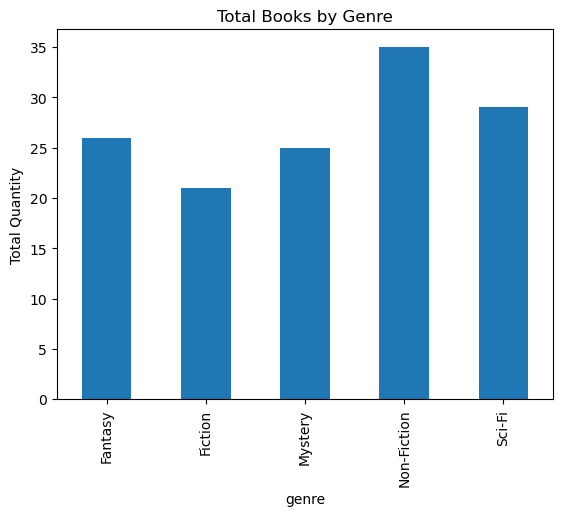

In [42]:
import matplotlib.pyplot as plt

df = run_query("SELECT genre, SUM(qty) AS total_qty FROM books GROUP BY genre;")
df.plot(kind="bar", x="genre", y="total_qty", legend=False)
plt.ylabel("Total Quantity")
plt.title("Total Books by Genre")
plt.show()

#### More Practice: Try a JOIN or Subquery
Write a query that joins two tables or uses a subquery. For example, find all customers who have placed more than one order.

In [43]:
# Example: Customers with more than one order
query = """
SELECT c.first_name, c.last_name, COUNT(o.order_id) as num_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
HAVING num_orders > 1;
"""
df = run_query(query)
display(df)

# Try your own JOIN or subquery below:
# query = "YOUR SQL HERE"
# df = run_query(query)
# display(df)

,first_name,last_name,num_orders
0,Alice,Smith,2
1,Bob,Johnson,2
2,Charlie,Lee,2
3,Diana,Wang,2
4,Ethan,Brown,2


### SQL SELECT Statement (Review)
The `SELECT` statement is fundamental to SQL. It is used to query data from a table. Here are a few variants. Try each and see the results!

In [44]:
# Select specific columns
query = "SELECT first_name, last_name FROM customers;"
df = run_query(query)
display(df)

# Try: Select only first names or only last names!

,first_name,last_name
0,Alice,Smith
1,Bob,Johnson
2,Charlie,Lee
3,Diana,Wang
4,Ethan,Brown
5,Fiona,Garcia
6,George,Martinez
7,Hannah,Kim
8,Ivan,Patel
9,Julia,Nguyen


In [45]:
# Select with a condition using WHERE
query = "SELECT * FROM orders WHERE total_amount > 100;"
df = run_query(query)
display(df)

# Try: Change the amount or use a different column!

,order_id,customer_id,order_date,total_amount
0,1,1,2023-01-15,150.0
1,2,2,2023-01-17,200.0
2,4,3,2023-01-22,300.0
3,5,4,2023-01-25,120.0
4,7,6,2023-01-29,220.0
5,8,7,2023-02-01,175.0
6,11,10,2023-02-07,400.0
7,12,2,2023-02-10,130.0
8,13,3,2023-02-12,210.0
9,15,5,2023-02-16,180.0


In [46]:
# Select with ordering
query = "SELECT * FROM orders ORDER BY total_amount DESC;"
df = run_query(query)
display(df)

# Try: Order by order_date or customer_id!

,order_id,customer_id,order_date,total_amount
0,11,10,2023-02-07,400.0
1,4,3,2023-01-22,300.0
2,7,6,2023-01-29,220.0
3,13,3,2023-02-12,210.0
4,2,2,2023-01-17,200.0
5,15,5,2023-02-16,180.0
6,8,7,2023-02-01,175.0
7,1,1,2023-01-15,150.0
8,12,2,2023-02-10,130.0
9,5,4,2023-01-25,120.0


### GROUP BY and HAVING (Review)
`GROUP BY` is used to group rows with the same values in specified columns. `HAVING` is used to filter groups based on aggregate functions. Try changing the grouping or the HAVING condition.

In [47]:
# Group books by genre and sum quantity
query = "SELECT genre, SUM(qty) AS total_qty FROM books GROUP BY genre;"
df = run_query(query)
display(df)

# Try: Group by a different column or use COUNT instead of SUM!

,genre,total_qty
0,Fantasy,26
1,Fiction,21
2,Mystery,25
3,Non-Fiction,35
4,Sci-Fi,29


In [48]:
# Filter grouped results using HAVING
query = """
SELECT genre, SUM(qty) AS total_qty
FROM books
GROUP BY genre
HAVING total_qty >= 10;
"""
df = run_query(query)
display(df)

# Try: Change the HAVING threshold!

,genre,total_qty
0,Fantasy,26
1,Fiction,21
2,Mystery,25
3,Non-Fiction,35
4,Sci-Fi,29


### SQL JOINs (Review)
JOINs are used to combine data from two or more tables based on a related column.
- `INNER JOIN`: returns only matching rows
- `LEFT JOIN`: returns all rows from the left table, even if there are no matches in the right table
Try both join types below!

In [49]:
# INNER JOIN
query = """
SELECT c.first_name, o.order_id, o.total_amount
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id;
"""
df = run_query(query)
display(df)

,first_name,order_id,total_amount
0,Alice,1,150.0
1,Bob,2,200.0
2,Alice,3,50.0
3,Charlie,4,300.0
4,Diana,5,120.0
5,Ethan,6,80.0
6,Fiona,7,220.0
7,George,8,175.0
8,Hannah,9,90.0
9,Ivan,10,60.0


In [50]:
# LEFT JOIN: shows all customers, even those without orders
query = """
SELECT c.first_name, o.order_id
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id;
"""
df = run_query(query)
display(df)

# Try: Show all customers and their total order amounts!

,first_name,order_id
0,Alice,1
1,Alice,3
2,Bob,2
3,Bob,12
4,Charlie,4
5,Charlie,13
6,Diana,5
7,Diana,14
8,Ethan,6
9,Ethan,15


### Subqueries (Review)
Subqueries can be nested inside `SELECT`, `FROM`, `WHERE`, or `HAVING` clauses. They are used to break down complex queries into manageable parts. Try each example and then write your own!

In [51]:
# Subquery in WHERE clause
query = """
SELECT username FROM users
WHERE id IN (
    SELECT user_id FROM likes WHERE post_id = 1215
);
"""
df = run_query(query)
display(df)

# Try: Change the post_id or select a different column!

,username
0,user1
1,user2
2,user3
3,user4
4,user5
5,user7
6,user8
7,user9


In [52]:
# Subquery in FROM clause
query = """
SELECT AVG(total_likes)
FROM (
    SELECT post_id, COUNT(*) AS total_likes
    FROM likes
    GROUP BY post_id
) AS like_counts;
"""
df = run_query(query)
display(df)

# Try: Show the like counts for each post!

,AVG(total_likes)
0,7.5


In [53]:
# Subquery in HAVING clause
query = """
SELECT customer_id, AVG(total_amount) as avg_amt
FROM orders
GROUP BY customer_id
HAVING avg_amt > (
    SELECT AVG(total_amount) FROM orders
);
"""
df = run_query(query)
display(df)

# Try: Change the HAVING condition or use a different aggregate!

,customer_id,avg_amt
0,2,165.0
1,3,255.0
2,6,220.0
3,7,175.0
4,10,400.0


#### 🚀 Interactive SQL Playground (Beta!)
Type your own SQL query below and see the results instantly! This cell uses an interactive form for live SQL experimentation. Try different SELECT, JOIN, GROUP BY, or even subqueries. If you break it, just re-run the setup cell above!

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Inject custom CSS for dark mode styling
# This will work in JupyterLab, VS Code, and classic Jupyter
# and will only affect this widget

display(widgets.HTML("""
<style>
.jp-Notebook .custom-sql-dark textarea, .custom-sql-dark textarea {
    background: #222 !important;
    color: #eee !important;
    border: 1px solid #444 !important;
    font-family: 'Fira Mono', 'Consolas', monospace;
}
</style>
"""))

# Default query
default_query = "SELECT * FROM customers;"

# Create a text area for SQL input
sql_input = widgets.Textarea(
    value=default_query,
    placeholder='Type your SQL query here',
    description='SQL:',
    layout=widgets.Layout(width='100%', height='80px'),
    style={'description_width': 'initial'}
)
sql_input.add_class("custom-sql-dark")

# Create a button to run the query
run_button = widgets.Button(
    description='Run Query',
    button_style='success',
    tooltip='Execute the SQL query and show results',
    icon='play'
)

# Output area for results
output = widgets.Output()

# Function to run the query and display results
def on_run_clicked(b):
    with output:
        clear_output()
        try:
            df = run_query(sql_input.value)
            if df.empty:
                print('No results returned.')
            else:
                display(df)
        except Exception as e:
            print(f"Error: {e}")

run_button.on_click(on_run_clicked)

# Display the interactive form
form = widgets.VBox([
    widgets.HTML('<b>Try your own SQL query below:</b>'),
    sql_input,
    run_button,
    output
])
display(form)

*Tip: Try queries like* `SELECT * FROM orders WHERE total_amount > 100;` *or* `SELECT genre, COUNT(*) FROM books GROUP BY genre;` *or even joins and subqueries!*